# Color Threshold

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
# Read in the image
image = cv2.imread("Images/pizza-blue-bg.png")

# Print out the type of image data and its dimensions
print("This image is: ", type(image), "with dimensions: ", image.shape)

This image is:  <class 'numpy.ndarray'> with dimensions:  (414, 650, 3)


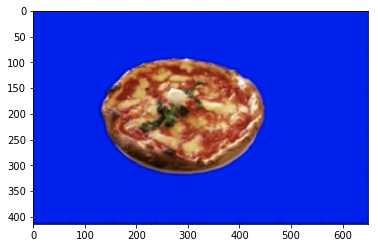

In [6]:
%matplotlib inline

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_copy)

#### Define the color threshold

In [41]:
# Define our color selection boundaries in RGB values
lower_blue = np.array([0, 0, 100])
upper_blue = np.array([100, 100, 255])

#### Create a mask

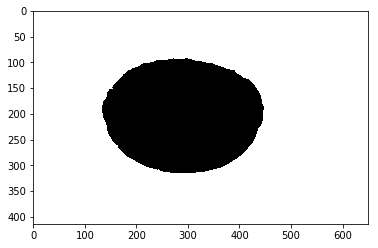

In [42]:
# Define the masked area
mask = cv2.inRange(image_copy, lower_blue, upper_blue)

plt.imshow(mask, cmap="gray")

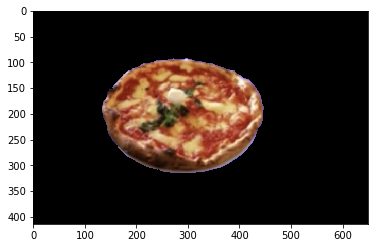

In [44]:
# Mask the image to let the pizza show through
masked_image = np.copy(image_copy)

masked_image[mask != 0] = [0, 0, 0]

plt.imshow(masked_image)

#### Mask and add a background image

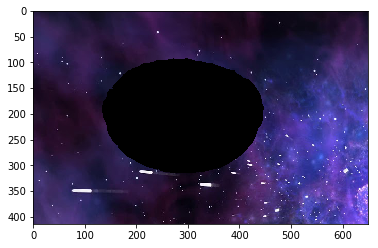

In [48]:
# Load in a background image, and convert it to RGB
bg_img = cv2.imread("Images/space-bg.jpg")
bg_img = cv2.cvtColor(bg_img, cv2.COLOR_BGR2RGB)

# Crop it to the right size (414, 650)
crop_bg = bg_img[0:414, 0:650]

# Mask the cropped background so that the pizza area is blocked
crop_bg[mask == 0] = [0, 0, 0]

# Display the background
plt.imshow(crop_bg)

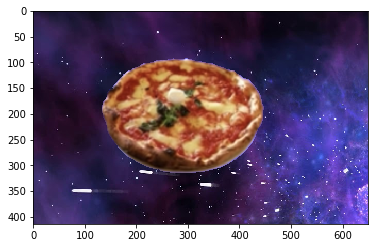

In [49]:
# Add the two images together to create a complete image
complete_image = crop_bg + masked_image

plt.imshow(complete_image)

# HSV Color Space, Balloons

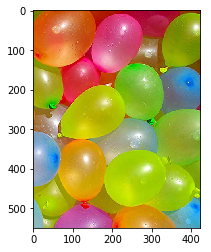

In [51]:
%matplotlib inline

image = cv2.imread("Images/water_balloons.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

### Plot color channels

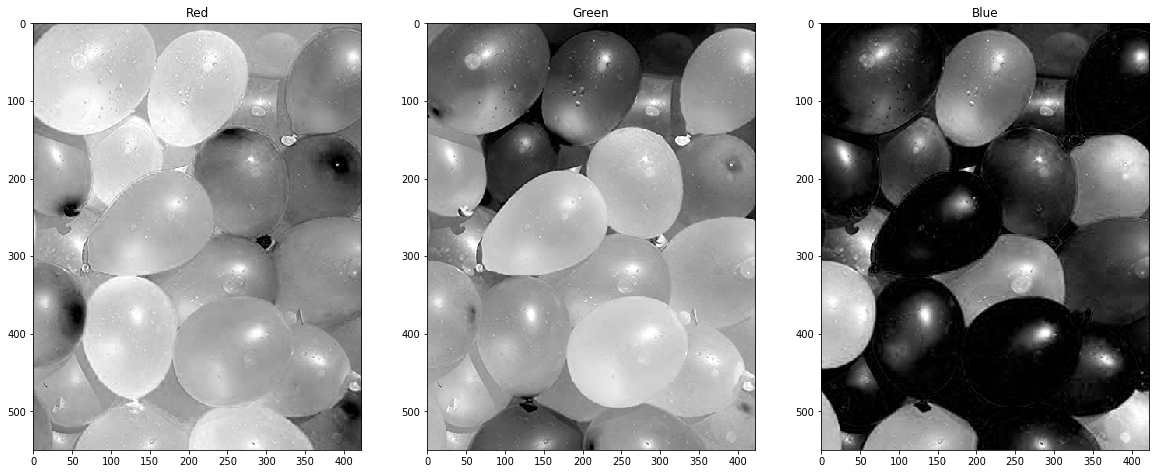

In [52]:
# RGB channels
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Red')
ax1.imshow(r, cmap='gray')

ax2.set_title('Green')
ax2.imshow(g, cmap='gray')

ax3.set_title('Blue')
ax3.imshow(b, cmap='gray')

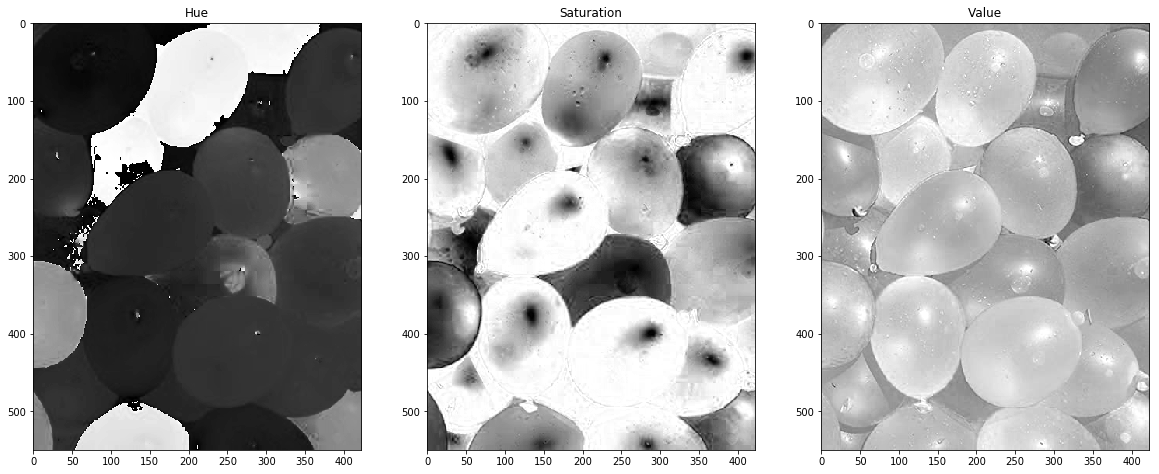

In [53]:
# Convert from RGB to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Hue')
ax1.imshow(h, cmap='gray')

ax2.set_title('Saturation')
ax2.imshow(s, cmap='gray')

ax3.set_title('Value')
ax3.imshow(v, cmap='gray')

### Define pink and hue selection thresholds

In [107]:
# Define our color selection criteria in HSV values
lower_hue = np.array([150,0,0]) 
upper_hue = np.array([174,210,255])

In [93]:
# Define our color selection criteria in RGB values
lower_pink = np.array([180,0,100]) 
upper_pink = np.array([255,255,230])

### Mask the image

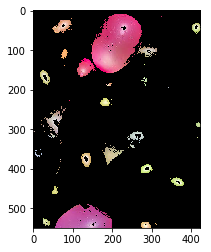

In [56]:
# Define the masked area in RGB space
mask_rgb = cv2.inRange(image, lower_pink, upper_pink)

# mask the image
masked_image = np.copy(image)
masked_image[mask_rgb==0] = [0,0,0]

# Vizualize the mask
plt.imshow(masked_image)

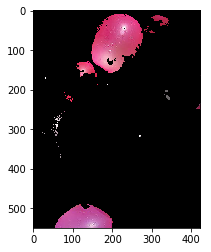

In [108]:
# Now try HSV!

# Define the masked area in HSV space
mask_hsv = cv2.inRange(hsv, lower_hue, upper_hue)

# mask the image
masked_image = np.copy(image)
masked_image[mask_hsv==0] = [0,0,0]

# Vizualize the mask
plt.imshow(masked_image)